Manuel Alejandro Moreno Niño, grupo:202016908_69

Fecha: 19/04/2023

_

_

Importamos las librerías, adicional a ello generamos el matplotlib que sirve para mostrar las gráficas, el font para establecer el tamaño

In [147]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
font = {'size' : 12}
plt.rc('font', **font)

Buscaremos en el directorio (prueba), ahora leeremos el excel con el comando pd.read, escribimimos delimiter que sirve para separar comas por columnas, ya hecho todos estos pasos procederemos a mostrar el encabezado

In [148]:
os.chdir("C:\Prueba")
datos=pd.read_csv("titanic.csv", delimiter=",")
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Ahora vamos a corregir los siguientes datos para entender correctamente las gráficas

In [149]:
datos['Survived']=datos['Survived'].map({
        0: 'No',
        1: 'Si'
    })
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Si,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Si,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Si,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Y datos de la embarcación

In [150]:
datos['Embarked']=datos['Embarked'].map({
        'S': 'Southampton',
        'C': 'Cherbourg',
        'Q': 'Queenstown'
    })
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,Si,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,Si,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,Si,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton


Ahora mostramos los datos generales con el siguiente comando, esto con el fin de saber que tipo de datos es

In [151]:
datos.dtypes

PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Describiremos los datos

In [152]:
datos.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


En este paso vamos hacer la estadística de la clase de usuarios que sobrevieron, para ello agrupamos (Groupby) y damos a las variables para generar la estadística

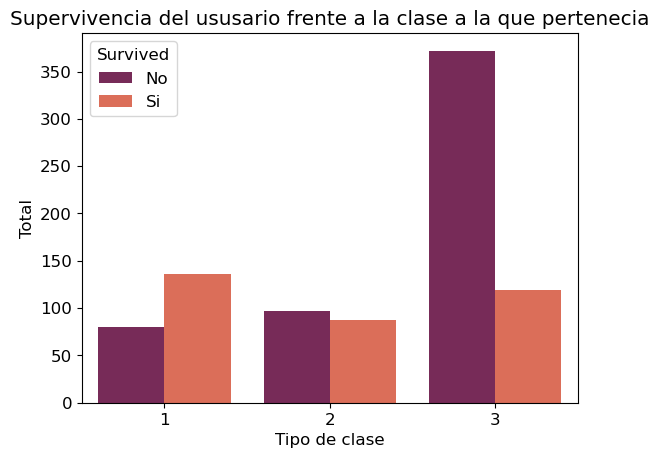

In [153]:
datos.groupby(['Pclass', 'Survived'])['Survived'].count()
ax=sns.countplot(x='Pclass', hue='Survived', palette='rocket', data=datos)
ax.set(title='Supervivencia del ususario frente a la clase a la que pertenecia', 
       xlabel='Tipo de clase', ylabel='Total')
plt.show()

Describiremos la cantidad de personas que sobrevivieron, pero en este caso el género indicará la cantidad de personas que se encuentran con vida o no (sex, survived, count)

In [154]:
datos.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  No           81
        Si          233
male    No          468
        Si          109
Name: Survived, dtype: int64

Ahora lo describiremos a través de una gráfica

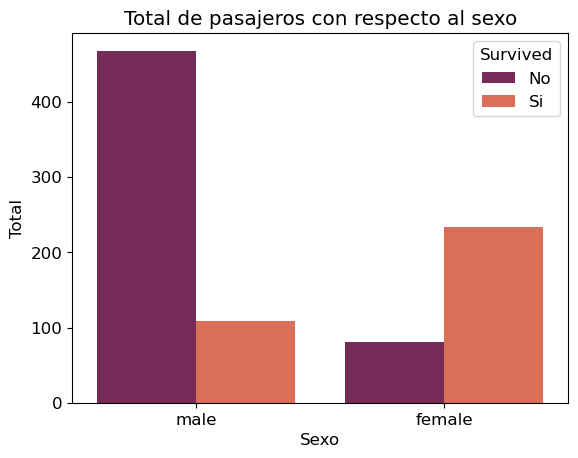

In [155]:
ax=sns.countplot(x='Sex', hue='Survived', palette='rocket', data=datos)
ax.set(title='Total de pasajeros con respecto al sexo', 
       xlabel='Sexo', ylabel='Total')
plt.show()

Ahora teniendo las dos variables de género y clase procedemos hacer una gráfica para determinar el procentaje de las personas que sobreviven

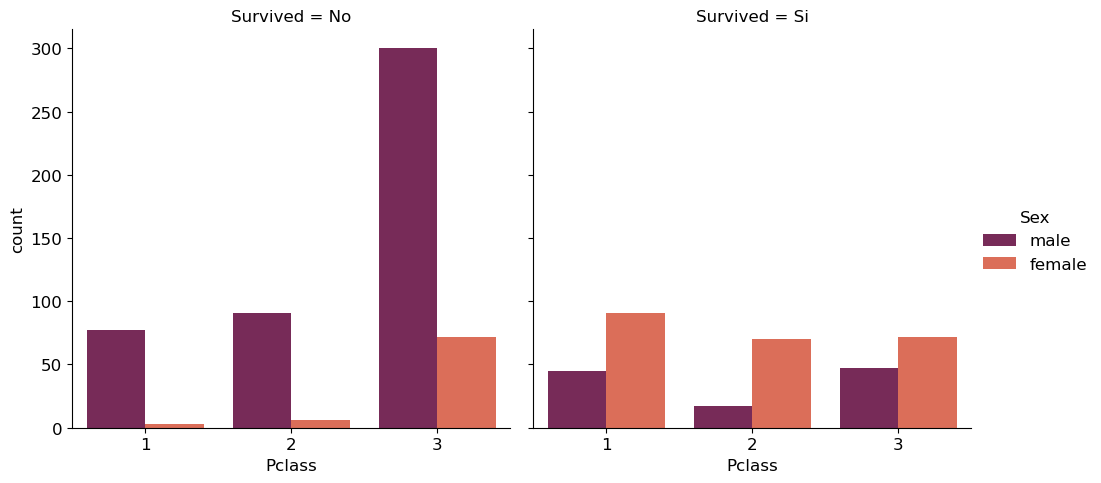

In [156]:
ax=sns.catplot(x='Pclass', hue='Sex', col='Survived', palette='rocket', 
               data=datos, kind="count")
plt.show()

Vamos a llamar datos de embarcación y personas que estuvieron ahí

In [157]:
pd.crosstab(datos['Embarked'], datos['Survived'])

Survived,No,Si
Embarked,,
Cherbourg,75,93
Queenstown,47,30
Southampton,427,217


Ahora vamos hacer una gráfica sobre la distribución de supervivencia según la embarcación

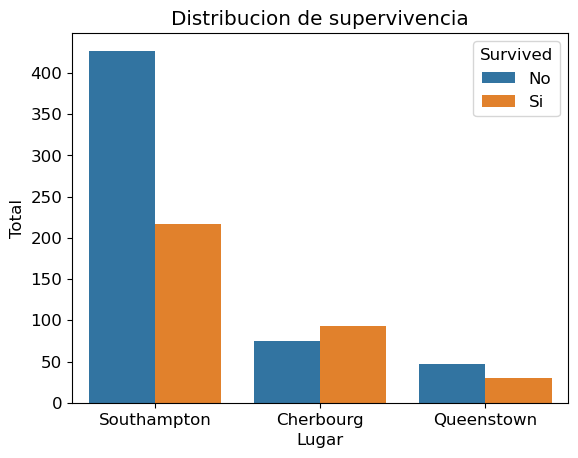

In [158]:
ax=sns.countplot(x='Embarked', hue='Survived', data=datos)
ax.set(title='Distribucion de supervivencia', 
       xlabel='Lugar', ylabel='Total')
plt.show()

Ahora agrupamos los datos de cabina  

In [159]:
datos['Cabin'].groupby(datos['Cabin']).count()

Cabin
A10    1
A14    1
A16    1
A19    1
A20    1
      ..
F33    3
F38    1
F4     2
G6     4
T      1
Name: Cabin, Length: 147, dtype: int64

Sacaremos el dato de las personas menores de 18

In [160]:
datos[datos['Age']<18]['Age'].count()

113

Ahora sacaremos un intervalo entre la edad (-18) y la clase, adicional ello se hará la contabilidad en cada clase

In [161]:
intervaloEdad1=datos[datos['Age']<18].pivot_table(values='Age', index='Pclass', aggfunc='count')
intervaloEdad1

,Age
Pclass,
1,12
2,23
3,78


Ahora vamos a sacar el intervalo de las personas mayores entre 18 hasta los 50 

In [162]:
intervaloEdad2=datos[(datos['Age']>=18) & (datos['Age']<=50)].pivot_table(values='Age', index='Pclass', aggfunc='count')
intervaloEdad2

,Age
Pclass,
1,135
2,135
3,267


Por último sacaremos el dato de las personas mayores de 50

In [163]:
intervaloEdad3=datos[datos['Age']>50].pivot_table(values='Age', index='Pclass', aggfunc='count')
intervaloEdad3

,Age
Pclass,
1,39
2,15
3,10


Ya teniendo los datos, procedemos hacer la gráfica circular

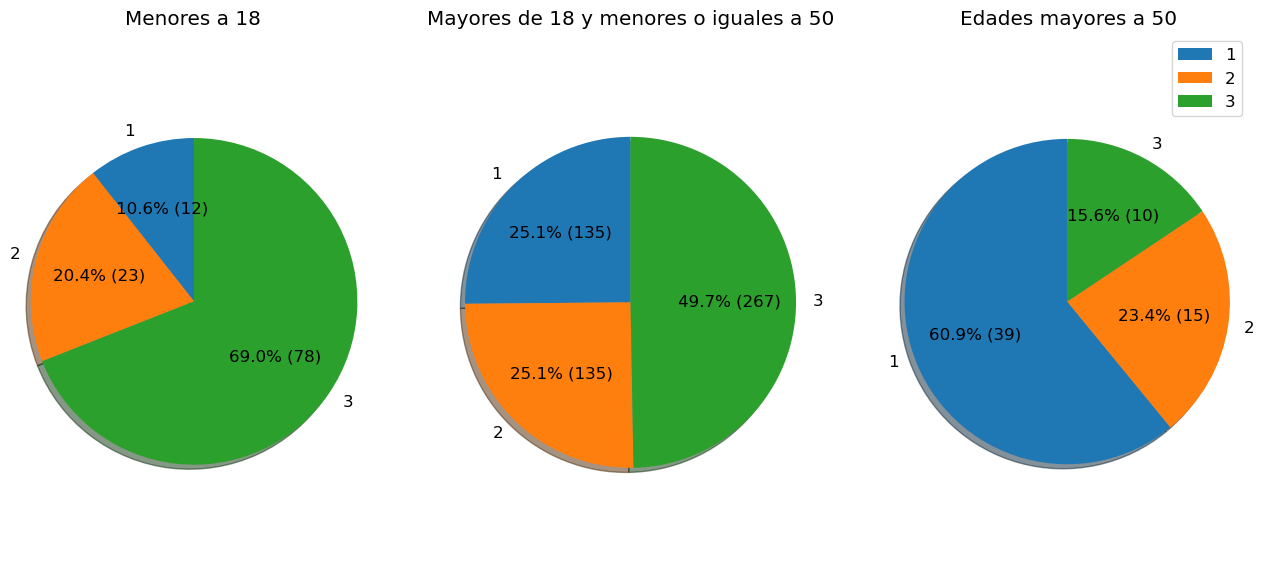

In [164]:
fig, ax=plt.subplots(1, 3, figsize = (16, 7))
ax[0].pie(intervaloEdad1['Age'].to_list(), labels=intervaloEdad1.index.to_list(), 
        autopct=funcPie(intervaloEdad1['Age'].to_list()), shadow=True, startangle=90)
ax[0].axis('equal')
ax[0].set_title('Menores a 18')  
ax[1].pie(intervaloEdad2['Age'].to_list(), labels=intervaloEdad2.index.to_list(),
        autopct=funcPie(intervaloEdad2['Age'].to_list()), shadow=True, startangle=90)
ax[1].axis('equal') 
ax[1].set_title('Mayores de 18 y menores o iguales a 50')  
ax[2].pie(intervaloEdad3['Age'].to_list(), labels=intervaloEdad3.index.to_list(),
        autopct=funcPie(intervaloEdad3['Age'].to_list()), shadow=True, startangle=90)
ax[2].axis('equal')  
ax[2].set_title('Edades mayores a 50') 
plt.legend()
plt.show()

Ahora procedemos en sacar el dato general entre el año, género, la clase y si la persona sobrevivió 

In [165]:
aux=datos[['Age', 'Sex', 'Pclass', 'Survived']].groupby('Age').filter(lambda x: (x['Age']).any())
aux

,Age,Sex,Pclass,Survived
0,22.0,male,3,No
1,38.0,female,1,Si
2,26.0,female,3,Si
3,35.0,female,1,Si
4,35.0,male,3,No
...,...,...,...,...
885,39.0,female,3,No
886,27.0,male,2,No
887,19.0,female,1,Si
889,26.0,male,1,Si


Agrupamos (Groupby)

In [166]:
aux=datos.groupby(['Pclass', 'Sex'])['Pclass'].count()
aux

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: Pclass, dtype: int64

Ahora contaremos por el género sin tener en cuenta la clase

In [167]:
aux[1]

Sex
female     94
male      122
Name: Pclass, dtype: int64

Ahora sacaremos el porcentaje de genero que estuvo en diferentes clases (1, 2 y 3)

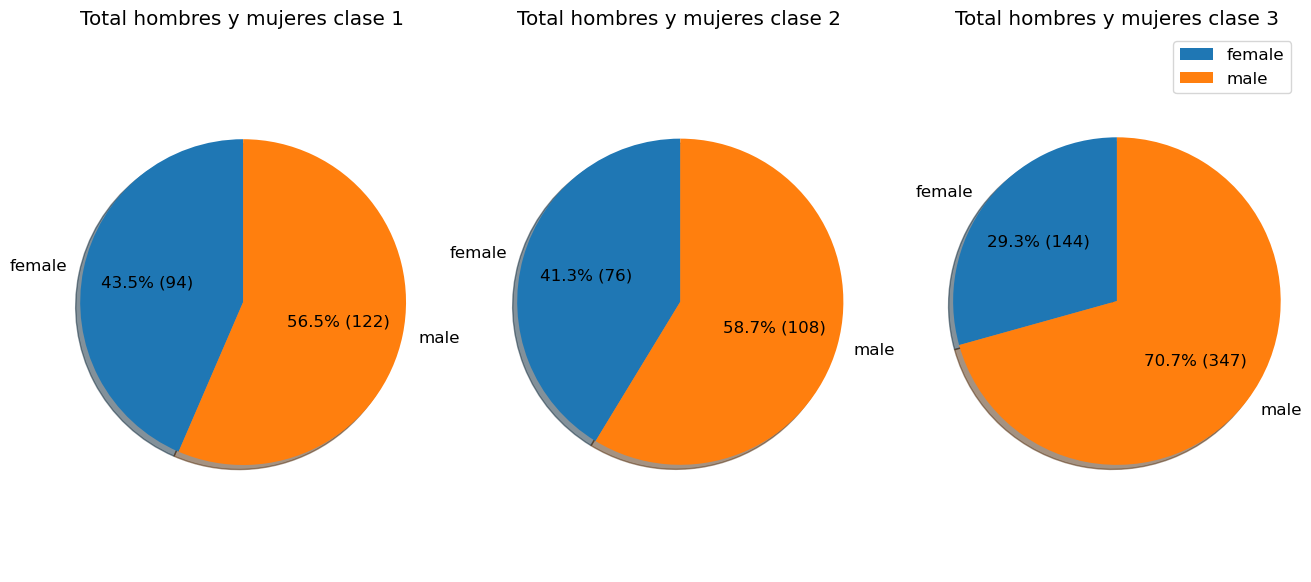

In [168]:
fig, ax=plt.subplots(1, 3, figsize = (16, 7))
ax[0].pie(aux[1].to_list(), labels=aux[1].index.to_list(), 
              autopct=funcPie(aux[1].to_list()), shadow=True, startangle=90)
ax[0].axis('equal')
ax[0].set_title('Total hombres y mujeres clase 1')
ax[1].pie(aux[2].to_list(), labels=aux[2].index.to_list(), 
              autopct=funcPie(aux[2].to_list()), shadow=True, startangle=90)
ax[1].axis('equal')
ax[1].set_title('Total hombres y mujeres clase 2')
ax[2].pie(aux[3].to_list(), labels=aux[3].index.to_list(), 
              autopct=funcPie(aux[3].to_list()), shadow=True, startangle=90)
ax[2].axis('equal')
ax[2].set_title('Total hombres y mujeres clase 3')
plt.legend()
plt.show()